In [14]:
import nltk
from nltk.corpus import cmudict
import Levenshtein
import matplotlib.pyplot as plt

# Initialize an empty list to hold the titles
titles = []
try:
    with open('words.txt', 'r', encoding='utf-8') as f:
        for line in f:
            titles.append(line.strip())
except UnicodeDecodeError as e:
    print(f"Error reading words.txt: {e}")

In [ ]:
d = cmudict.dict()

def word_to_phonetics(word):
    try:
        phonetic_representation = d[word.lower()][0]
        return phonetic_representation
    except KeyError:
        return None
    
def sentence_to_phonetics(sentence):
    words = sentence.split()
    phonetics = []
    for word in words:
        phonetic_representation = word_to_phonetics(word)
        if phonetic_representation:
            for phoneme in phonetic_representation:
                phonetics.append(phoneme)
        else:
            phonetics.append(word)
    return phonetics

def phonetic_similarity(phonetics1, phonetics2):
    # Join the phonetic representations into strings
    phonetic_str1 = ' '.join(phonetics1)
    phonetic_str2 = ' '.join(phonetics2)
    distance = Levenshtein.distance(phonetic_str1, phonetic_str2)
    max_len = max(len(phonetic_str1), len(phonetic_str2))
    if max_len == 0:
        return 1
    similarity = 1 - (distance / max_len)
    return similarity


In [45]:
for title in titles:
    phonetics = sentence_to_phonetics(title)
    print(f"{title}: {phonetics}")

GOOD LUCK TUMWATER: ['G', 'UH1', 'D', 'L', 'AH1', 'K', 'TUMWATER']
: []
: []
: []
: []
LV: ['LV']
ROSY: ['R', 'OW1', 'Z', 'IY0']
HIGHEST QUALITY SINCE 1844: ['HH', 'AY1', 'AH0', 'S', 'T', 'K', 'W', 'AA1', 'L', 'AH0', 'T', 'IY0', 'S', 'IH1', 'N', 'S', '1844']
GERBER: ['G', 'ER1', 'B', 'ER0']
THE CAPCO PARADE OF NUTS: ['DH', 'AH0', 'CAPCO', 'P', 'ER0', 'EY1', 'D', 'AH1', 'V', 'N', 'AH1', 'T', 'S']
CCC: ['CCC']
RIASOL: ['RIASOL']
PRESERVALINE MANUFACTURING CO., THE: ['PRESERVALINE', 'M', 'AE2', 'N', 'Y', 'AH0', 'F', 'AE1', 'K', 'CH', 'ER0', 'IH0', 'NG', 'CO.,', 'DH', 'AH0']
L. & C. HARDTMUTH, INC.: ['EH1', 'L', '&', 'S', 'IY1', 'HARDTMUTH,', 'IH1', 'NG', 'K']
FAIR: ['F', 'EH1', 'R']
MILK FARM, THE: ['M', 'IH1', 'L', 'K', 'FARM,', 'DH', 'AH0']
GULF: ['G', 'AH1', 'L', 'F']
WALTER W. ROSS AND COMPANY, INC.: ['W', 'AO1', 'L', 'T', 'ER0', 'D', 'AH1', 'B', 'AH0', 'L', 'Y', 'UW0', 'R', 'AA1', 'S', 'AH0', 'N', 'D', 'COMPANY,', 'IH1', 'NG', 'K']
TIFFINY UNIFORMS: ['TIFFINY', 'Y', 'UW1', 'N', 'AH0'

In [48]:
scores = []
scores2 = []
for i in range(1000):
    for j in range(i):
        phonetics1 = sentence_to_phonetics(titles[i])
        phonetics2 = sentence_to_phonetics(titles[j])
        similarity = phonetic_similarity(phonetics1, phonetics2)
        scores.append(similarity)
        if similarity > 0.8:
            print(f"{i}, {j} : {titles[i]}: {titles[j]}: {similarity}")

2, 1 : : : 1
3, 1 : : : 1
3, 2 : : : 1
4, 1 : : : 1
4, 2 : : : 1
4, 3 : : : 1
19, 8 : GERBER: GERBER: 1.0
21, 10 : CCC: CCC: 1.0
22, 14 : FAIR: FAIR: 1.0
23, 8 : GERBER: GERBER: 1.0
23, 19 : GERBER: GERBER: 1.0
30, 10 : CCC: CCC: 1.0
30, 21 : CCC: CCC: 1.0
111, 10 : CCC: CCC: 1.0
111, 21 : CCC: CCC: 1.0
111, 30 : CCC: CCC: 1.0
124, 10 : CCC: CCC: 1.0
124, 21 : CCC: CCC: 1.0
124, 30 : CCC: CCC: 1.0
124, 111 : CCC: CCC: 1.0
149, 88 : LIFE: LIFE: 1.0
187, 186 : PLAY: PLAY: 1.0
225, 179 : ALPHA INTERNATIONAL: ATLAS INTERNATIONAL: 0.9130434782608696
226, 179 : ALPHA INTERNATIONAL: ATLAS INTERNATIONAL: 0.9130434782608696
226, 225 : ALPHA INTERNATIONAL: ALPHA INTERNATIONAL: 1.0
233, 130 : STARBUCKS COFFEE: STARBUCKS COFFEE: 1.0
279, 27 : K: K: 1.0
306, 188 : M: M: 1.0
314, 251 : ICE: ICE: 1.0
316, 130 : STARBUCKS COFFEE: STARBUCKS COFFEE: 1.0
316, 233 : STARBUCKS COFFEE: STARBUCKS COFFEE: 1.0
335, 186 : PLAY: PLAY: 1.0
335, 187 : PLAY: PLAY: 1.0
338, 232 : S & H: SH: 0.8571428571428572
386, 2

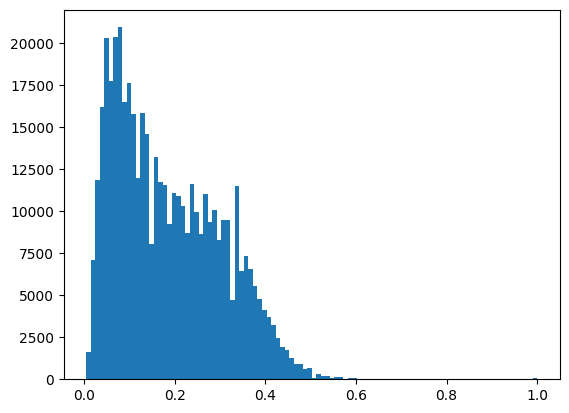

In [ ]:
# plot the distribution of scores greater than 0 
scores = [s for s in scores if s > 0]
plt.hist(scores, bins=100)
plt.show()
